In [48]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state= 42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

print(knr.predict([[50]]))
# 실제 무게와는 큰 차이가 발생

[1033.33333333]


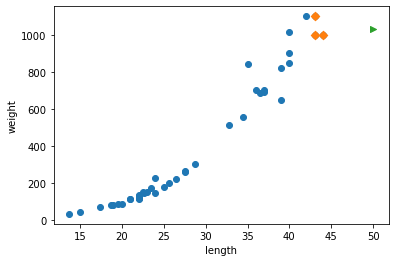

[1033.33333333] 1033.3333333333333


In [49]:
distances, indexes = knr.kneighbors([[50]])

plt.xlabel('length')
plt.ylabel('weight')
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, knr.predict([[50]]), marker='>')
plt.show()

print(knr.predict([[50]]), np.mean(train_target[indexes])) # 같음
# k-최근접 이웃 회귀는 샘플이 훈련 세트의 범위를 벗어나면 정확도가 떨어짐

In [50]:
# 선형 회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)
print(lr.predict([[50]]), lr.coef_, lr.intercept_)
# y = ax + b 직선의 a는 lr.coef_에, b는 lr.intercept_에 있다


[1241.83860323] [39.01714496] -709.0186449535477


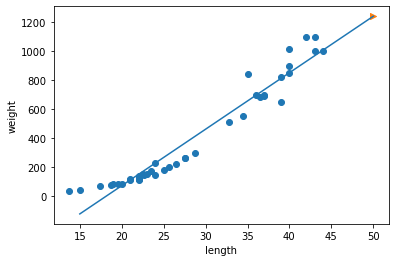

In [51]:
plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')

plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_]) # 농어의 길이 15 ~ 50cm까지 직선
plt.scatter(50, 1241.8, marker= '>')

In [52]:
print(lr.score(test_input, test_target), lr.score(train_input, train_target))
# 두 값 모두 작으므로 과소적합
# 위 그래프는 농어의 무게가 음수가 될 수 있으므로 적합하지 않은 모델임

0.8247503123313558 0.939846333997604


In [53]:
# 다항 회귀 : 다항식을 사용한 선형 회귀
# 최적의 곡선 모델 찾기 (y = ax2 + bx + c)
# 훈련 모델에 길이의 제곱 항이 추가되어야 함
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
# train_poly에는 이제 length ** 2와 length가 같이 있음

lr.fit(train_poly, train_target)
print(lr.predict([[50 ** 2, 50]]))
print(lr.coef_, lr.intercept_) # 무게 = 1.01 x 길이 ** 2 - 21.5 * 길이 + 116.05
print(lr.score(test_poly, test_target), lr.score(train_poly, train_target))

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827831
0.9775935108325122 0.9706807451768623


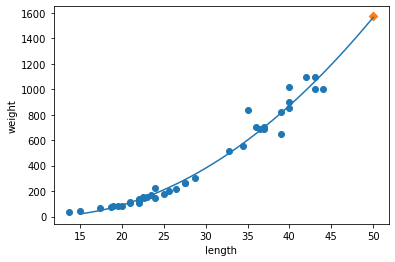

In [54]:
# 그래프 그리기
# 짧은 거리에 직선을 그어 곡선 표현
point = np.arange(15,51)

plt.plot(point, 1.01 * point ** 2 - 21.5 * point + 116.05)

plt.scatter(train_input, train_target)
plt.scatter(50, 1574, marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()